Instructions for using Jupyter Notebook: Go through each cell sequentially and run each code by pressing CTRL + ENTER on Windows or COMMAND + ENTER on Mac. You can run and move to the next cell by pressing SHIFT + ENTER. Alternatively, you can click the "Run" button at the top of the interface. Code is displayed if you wish to edit it in any way.

The video below illustrates the fluctuations of an ideal polymer chain - that is, a chain which has monomers bonded together but that otherwise do not interact (the polymer equivalent of an ideal gas). The video is from a coarse-grained molecular dynamics simulation where each bead represents a monomer or set of monomers - that is, each bead corresponds to a Kuhn segment and the corresponding bond length between segments corresponds to the Kuhn length, b. The red beads represent the ends so you can see how the end-to-end distance fluctuates.

You can manipulate the video by clicking and dragging to rotate, right-clicking and dragging to translate, and using the mouse wheel to zoom-in and out. Pressing r on the keyboard will reset the view. You can play the trajectory and manipulate the specific frame using the scrollbar at bottom.

In [66]:
import nglview as ng
import mdtraj as md
trajideal = md.load('res/L6_ideal_chain.xyz', top='res/L6_ideal_chain_top.pdb')
view = ng.show_mdtraj(trajideal)
view.clear_representations()
view.add_representation('spaceFill', selection='all', color="silver")
view.add_representation('spaceFill', selection='@0,99', color="red")
view

NGLWidget(max_frame=1000)

Let's now see how the statistics of our simulation match expectations. The ideal polymer chain above has 100 Kuhn segments (N = 100) and a bond length between each segment of 0.15 nm (b = 0.15 nm). Below, we plot the end-to-end distance measured from the simulation as a function of simulation time, then compare the average value of <r^2>^(1/2) measured from the simulation to <r^2>^(1/2) = (nl^2)^(1/2) computed from our in-class derivation. They compare pretty well - better agreement would be obtained from a longer simulation.

The average end-to-end distance in nm is 0.15642613172531128 nm
The expected end-to-end distance for this ideal chain is 0.15 nm


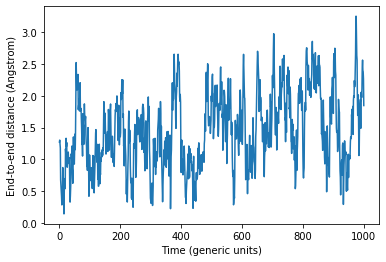

In [76]:
import numpy as np
import matplotlib as mpl
#from scipy.stats import norm
import matplotlib.pyplot as plt

# calculate (signed) end-to-end displacement with time
displacements = md.compute_displacements(trajideal, [[0, 99]], opt='True')
# convert to distances and plot
distances = np.linalg.norm(displacements, axis=2)
plt.ylabel('End-to-end distance (Angstrom)')
plt.xlabel('Time (generic units)')
plt.plot(distances)

# now calculate <r^2>^(1/2)
distances2 = np.square(distances)
avgr = np.sqrt(np.mean(distances2))/10
print('The average end-to-end distance in nm is', avgr, 'nm')
# Compare to nL2
expectedr = np.sqrt(100*0.15*0.15)/10
print('The expected end-to-end distance for this ideal chain is', expectedr, 'nm')

We now consider a modification to this simulation to include the effect of excluded volume, leading to a nonideal chain with a value of alpha that differs from 1. First, let's consider the same chain as before, but now we add an interaction between beads (excluding beads that are bonded together) that is purely repulsive, and therefore prevents beads from overlapping. This is equivalent to adding only the repulsive part of a Lennard-Jones potential such that the beads exclude volume and exhibit steric hindrance. The corresponding potential is plotted below as a function of the distance between beads, r, with the energy scale in units of thermal energy, kT.

<img src="res/L6_WCA_Plot.png" width="600"/>

A video of the resulting simulation is shown below, along with corresponding calculations in the next cell. You'll note that the polymer is visibly extended due to steric hindrance, leading to a value of alpha that is greater than 1.

In [71]:
trajwca = md.load('res/L6_wca_chain.xyz', top='res/L6_ideal_chain_top.pdb')
view2 = ng.show_mdtraj(trajwca)
view2.clear_representations()
view2.add_representation('spaceFill', selection='all', color="silver")
view2.add_representation('spaceFill', selection='@0,99', color="red")
view2

NGLWidget(max_frame=1000)

The average end-to-end distance in nm is 0.21453192234039306 nm
The expected end-to-end distance for a corresponding ideal chain is 0.15 nm
The value of alpha for this nonideal chain is 1.4302128156026204


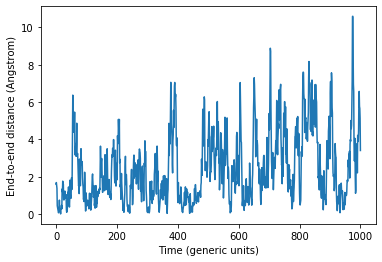

In [75]:
# calculate (signed) end-to-end displacement with time
displacementswca = md.compute_displacements(trajwca, [[0, 99]], opt='True')
# convert to distances and plot
distanceswca = np.linalg.norm(displacementswca, axis=2)
plt.ylabel('End-to-end distance (Angstrom)')
plt.xlabel('Time (generic units)')
plt.plot(distanceswca)

# now calculate <r^2>^(1/2)
distanceswca2 = np.square(distanceswca)
avgrwca = np.sqrt(np.mean(distanceswca2))/10
print('The average end-to-end distance in nm is', avgrwca, 'nm')
# Compare to nL2
expectedr = np.sqrt(100*0.15*0.15)/10
print('The expected end-to-end distance for a corresponding ideal chain is', expectedr, 'nm')
# calculate alpha
alpha = np.sqrt(avgrwca*avgrwca/(expectedr*expectedr))
print('The value of alpha for this nonideal chain is', alpha)

Finally, we now add an attractive part to the Lennard-Jones potential to then change the excluded volume further. The corresponding potential is plotted below as a function of the distance between beads, r, with the energy scale in units of thermal energy, kT.

<img src="res/L6_LJ_Plot.png" width="600"/>

A video of the resulting simulation is shown below, along with corresponding calculations in the next cell. The attractive interactions cause the polymer to again collapse in size, leading to an end-to-end distance smaller than that of the corresponding ideal chain.

In [79]:
trajlj = md.load('res/L6_lj_chain.xyz', top='res/L6_ideal_chain_top.pdb')
view3 = ng.show_mdtraj(trajlj)
view3.clear_representations()
view3.add_representation('spaceFill', selection='all', color="silver")
view3.add_representation('spaceFill', selection='@0,99', color="red")
view3

NGLWidget(max_frame=1000)

The average end-to-end distance in nm is 0.12052587270736695 nm
The expected end-to-end distance for a corresponding ideal chain is 0.15 nm
The value of alpha for this nonideal chain is 0.803505818049113


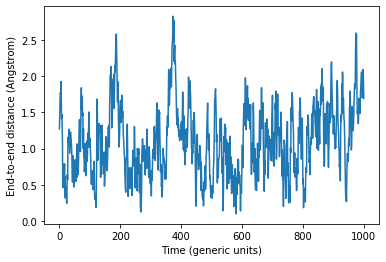

In [78]:
# calculate (signed) end-to-end displacement with time
displacementslj = md.compute_displacements(trajlj, [[0, 99]], opt='True')
# convert to distances and plot
distanceslj = np.linalg.norm(displacementslj, axis=2)
plt.ylabel('End-to-end distance (Angstrom)')
plt.xlabel('Time (generic units)')
plt.plot(distanceslj)

# now calculate <r^2>^(1/2)
distanceslj2 = np.square(distanceslj)
avgrlj = np.sqrt(np.mean(distanceslj2))/10
print('The average end-to-end distance in nm is', avgrlj, 'nm')
# Compare to nL2
expectedr = np.sqrt(100*0.15*0.15)/10
print('The expected end-to-end distance for a corresponding ideal chain is', expectedr, 'nm')
# calculate alpha
alpha = np.sqrt(avgrlj*avgrlj/(expectedr*expectedr))
print('The value of alpha for this nonideal chain is', alpha)